In [1]:
# install the package for google colab 
# !pip install pylca 

In [2]:
"""
LCA, demonstrate the effect of leak
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylca import LCA

sns.set(style='white', palette='colorblind', context='talk')
np.random.seed(0)
%matplotlib inline 

In [3]:
"""model params
"""
n_units = 3
# input weights
w_input = 1
# decision param
competition = 1
self_excit = 0
# time step size
dt = .1
#
self_excit = 0
w_cross = 0
offset = 0
noise_sd = .1

"""run LCA
"""
# make inputs: turning on more and more units
T = 25
input_pattern = [1,0,0]
input_seq = np.tile(input_pattern, (T, 1))

leaks = [0, .3, .9]
# run LCA for all input patterns
vals = []
for leak in leaks:
    # init LCA
    lca = LCA(
        n_units, dt, leak, competition,
        self_excit=self_excit, w_input=w_input, w_cross=w_cross,
        offset=offset, noise_sd=noise_sd,
    )   
    vals.append(lca.run(input_seq))

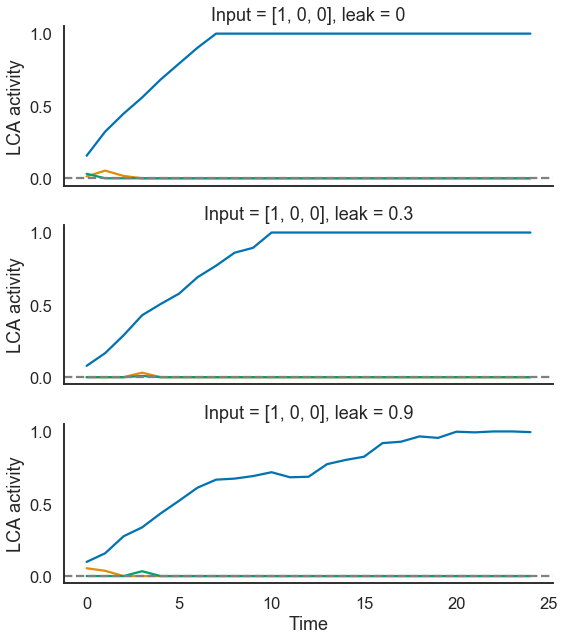

In [4]:
"""plot
if more units are activated, they compete and inhibit each other,
as a result, the uncertainty of the system is larger
"""

title_list = ['Turn on %d units' % (k+1) for k in range(n_units)]

f, axes = plt.subplots(len(leaks), 1, figsize=(8, 3*len(leaks)), sharex=True)
for i, ax in enumerate(axes):
    ax.plot(vals[i])
    ax.set_title(f'Input = {input_pattern}, leak = {leaks[i]}')
    ax.set_ylabel('LCA activity')
    ax.set_ylim([-.05, 1.05])
    ax.axhline(0, linestyle='--', color='grey')
axes[-1].set_xlabel('Time')
f.tight_layout()
sns.despine()

In [5]:
"""
try more leaks, turn off noise
"""
leaks = np.linspace(0,1,6)
noise_sd = 0
print('leaks: ', leaks)

# run LCA for all input patterns
vals = []
for leak in leaks:
    # init LCA
    lca = LCA(
        n_units, dt, leak, competition,
        self_excit=self_excit, w_input=w_input, w_cross=w_cross,
        offset=offset, noise_sd=noise_sd,
    )   
    vals.append(lca.run(input_seq))

leaks:  [0.  0.2 0.4 0.6 0.8 1. ]


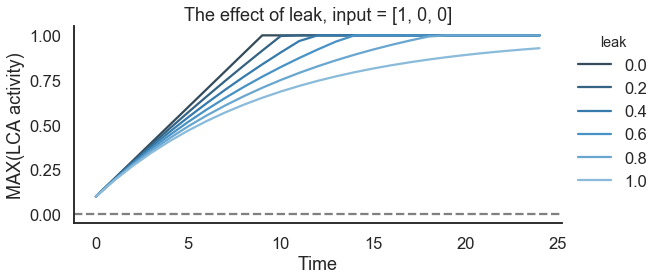

In [6]:
"""plot
if more units are activated, they compete and inhibit each other,
as a result, the uncertainty of the system is larger
"""

f, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
col_pal = sns.color_palette('Blues_d', n_colors=len(leaks))
for i in range(len(leaks)):
    ax.plot(np.max(vals[i],axis=1), color=col_pal[i]) 
ax.set_title(f'The effect of leak, input = {input_pattern}')
ax.set_ylabel('MAX(LCA activity)')
ax.set_xlabel('Time')
ax.set_ylim([-.05, 1.05])
ax.axhline(0, linestyle='--', color='grey')
legend_list = [f'%.1f' % leak for leak in leaks]
leg = f.legend(legend_list, frameon=False, bbox_to_anchor=(1.15, .9))
leg.set_title('leak', prop = {'size':'x-large'})
f.tight_layout()
sns.despine()